In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

MCMC Assignment 1

In [3]:
mu = 1
sigma = 1
norm = np.random.normal(loc=1, scale=1, size=10000)

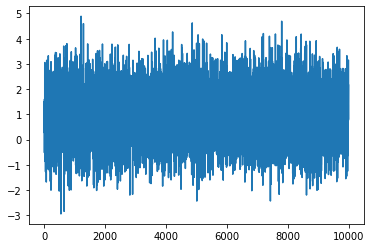

In [4]:
plt.plot(norm)
plt.show()

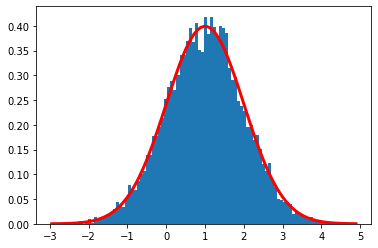

In [5]:
count, bins, ignored = plt.hist(norm,bins=100,density=True)
plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2) ),linewidth=3,color='r')
plt.show()

In [7]:
def pOf(x,sigma=1,mu=1):
    return (1.0/(sigma*np.sqrt(2.0*np.pi))) * (np.e**(-((x-mu)**2)/(2.0*sigma**2))) 
    
def gaussianChain(mu=1,sigma=1,N=10000):
    x = []
    x.append(np.random.random())
    accepted = 0
    
    for i in range(0,N):
        y = x[i] + np.random.normal(loc=0,scale=sigma)
        h = pOf(y)/pOf(x[i])
        alpha = np.random.random()
        if h>= alpha:
            x.append(y)
            accepted+=1
        else:
            x.append(x[i])
    
    acceptedPercent = accepted/N
    
    return x, acceptedPercent
    

In [8]:
def showPlots(jump_sigma=1,hist_bins=100,compare_sigma=1,compare_mu=1):
    chain, acceptance = gaussianChain(sigma=jump_sigma)
    print("Accepted: "+ str(acceptance*100)+"%")
    plt.plot(chain)
    plt.show()
    count, bins, ignored = plt.hist(chain,bins=hist_bins,density=True)
    plt.plot(bins,1/(compare_sigma*np.sqrt(2*np.pi))*np.exp(-(bins-compare_mu)**2/(2*compare_sigma**2) ),linewidth=3,color='r')
    plt.show()


Accepted: 99.66000000000001%


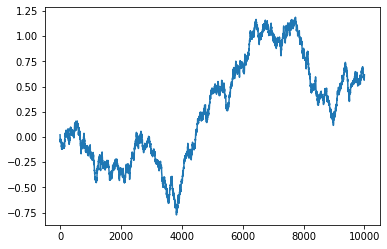

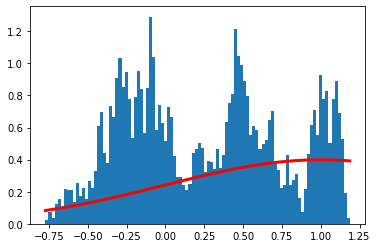

In [9]:
showPlots(.01)

Accepted: 96.85000000000001%


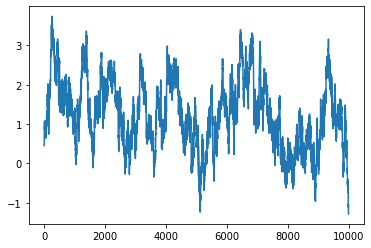

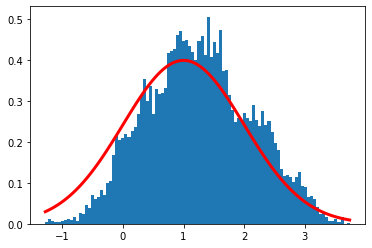

In [10]:
showPlots(.1)

Accepted: 71.21%


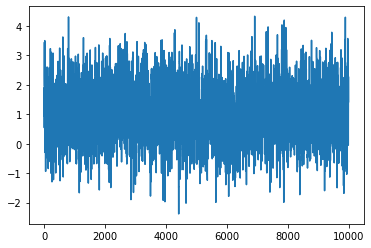

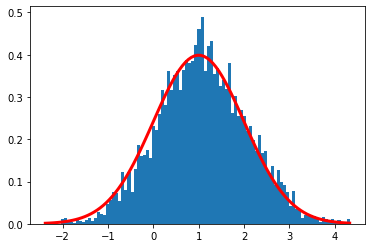

In [11]:
showPlots(1)

Accepted: 12.46%


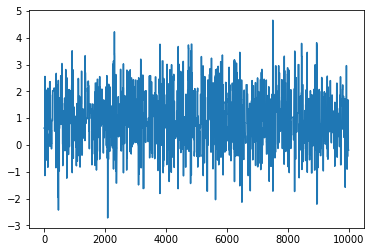

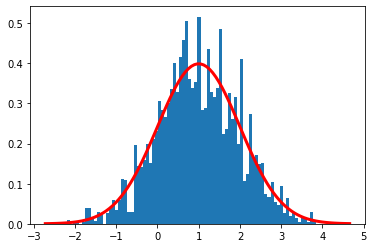

In [12]:
showPlots(10)

Accepted: 1.08%


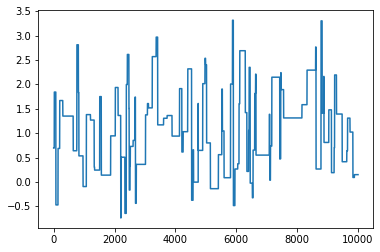

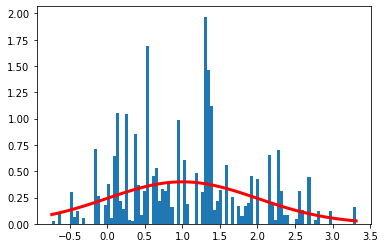

In [13]:
showPlots(100)

MCMC Assignment 2

In [14]:
def logLikelyhood(x,mu,sigma):
    retVal = 0
    for i in range(0,len(x)):
        retVal+=-((x[i]-mu)**2)/(2*(sigma**2))
    
    return (len(x)*np.log(1/(sigma*np.sqrt(2*np.pi))))+retVal

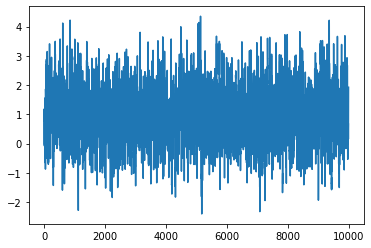

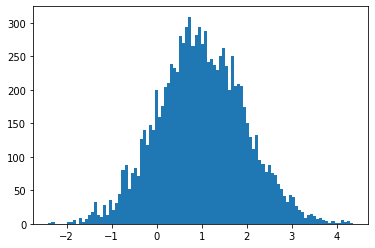

In [33]:
chain, acceptanceRate = gaussianChain(sigma=1,N=10000)
plt.plot(chain)
plt.show()
plt.hist(chain,bins=100)
plt.show()

In [34]:
def findBestGuessGaussian(chain,mu=1,sigma=1,N=1000):
    guesses = []
    bestGuess = None
    for i in range(0,N):
        Nmu = np.random.normal(loc=mu, scale=sigma)
        Nsigma = np.random.normal(loc=mu, scale=sigma)
        likelyhood = logLikelyhood(chain,Nmu,Nsigma)
        guesses.append((Nmu,Nsigma,likelyhood))
        if(bestGuess==None or likelyhood > bestGuess[2]):
            bestGuess = (Nmu,Nsigma,likelyhood)
    
    return guesses, bestGuess
    
def findBestGuessUniform(chain,mu=1,sigma=1,N=1000):
    guesses = []
    best = None
    for i in range(0,N):
        Nmu = (np.random.random()*3)+mu
        Nsigma = (np.random.random()*3)+sigma
        likely = logLikelyhood(chain,Nmu,Nsigma)
        guesses.append([Nmu,Nsigma,likely])
        if(best==None or likely>best[2]):
            best = [Nmu,Nsigma,likely]
        
    return guesses, best

In [35]:
guesses1, best1 = findBestGuessGaussian(chain,1,1,1000)
print("Tested {} different pairs".format(len(guesses1)))
print("Best guess: \nMu:{}\nSigma:{}\nLnLikelyhood:{}".format(best1[0],best1[1],best1[2]))

/home/kyle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


Tested 1000 different pairs
Best guess: 
Mu:0.9700431473600777
Sigma:0.977077798169834
LnLikelyhood:-13807.588042785621


In [36]:
guesses2, best2 = findBestGuessUniform(chain,1,1,1000)
print("Tested {} different pairs".format(len(guesses2)))
print("Best guess: \nMu:{}\nSigma:{}\nLnLikelyhood:{}".format(best2[0],best2[1],best2[2]))

Tested 1000 different pairs
Best guess: 
Mu:1.0137011421654694
Sigma:1.0070585255950855
LnLikelyhood:-13827.389090665583


In [37]:
print(logLikelyhood(chain,1,1))
print(logLikelyhood(chain,1,.8))
print(logLikelyhood(chain,1,1.2))

-13819.060921352024
-14191.07788071793
-14228.116500890232


In [38]:
guesses1 = np.array(guesses1).swapaxes(0,1)
print(type(guesses1))
guesses2 = np.array(guesses2).swapaxes(0,1)
print(type(guesses2))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


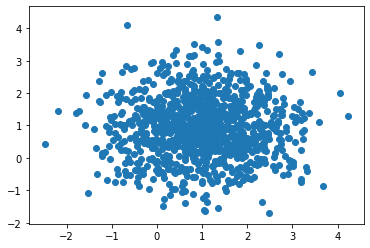

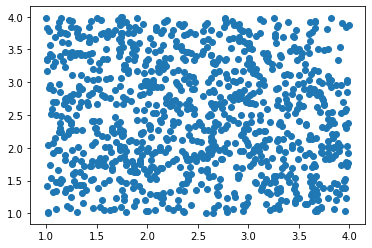

In [39]:
plt.scatter(guesses1[0],guesses1[1])
plt.show()
plt.scatter(guesses2[0],guesses2[1])
plt.show()

In [104]:
#doing it with an MCMC

def estimateMuSigma(x,stepSigma=1,N=1000):
    mu = [np.random.random()]
    sigma = [np.random.random()]
    likelyhoods = [logLikelyhood(x,mu[0],sigma[0])]
    accepted = 0
    
    for i in range(0,N):
        newMu = mu[i] + np.random.normal(loc=0,scale=stepSigma)
        newSigma = sigma[i] + np.random.normal(loc=0,scale=stepSigma)
        oldLikely = logLikelyhood(x,mu[i],sigma[i])
        newLikely = logLikelyhood(x,newMu,newSigma)
        logH=newLikely-oldLikely
        if logH>0:
            mu.append(newMu)
            sigma.append(newSigma)
            accepted+=1
        else:
            logAlpha = np.log(np.random.random())
            if logH >= logAlpha:
                mu.append(newMu)
                sigma.append(newSigma)
                likelyhoods.append(newLikely)
                accepted+=1
            else:
                mu.append(mu[i])
                sigma.append(sigma[i])
                likelyhoods.append(oldLikely)
    
    acceptedPercent = accepted/N
    
    return mu, sigma, likelyhoods, acceptedPercent


In [120]:
def muSigmaChains(chain,stepSigma=1,hist_bins=100,N=1000,burn=.25):
    muChain, sigmaChain, likelyhoods, acceptance = estimateMuSigma(chain,stepSigma=stepSigma,N=N)
    burnLength = int(N*burn)
    print("Accepted: "+ str(acceptance*100)+"%")
    plt.plot(muChain)
    plt.title("Mu Chain")
    plt.show()
    plt.plot(sigmaChain)
    plt.title('Sigma Chain')
    plt.show()
    plt.plot(likelyhoods)
    plt.title("Likelyhoods")
    plt.show()
    print("Histograms:")
    plt.hist(muChain[burnLength:],bins=hist_bins)
    plt.title('Mu histogram')
    plt.show()
    plt.hist(sigmaChain[burnLength:],bins=hist_bins)
    plt.title('Sigma histogram')
    plt.show()
    plt.scatter(muChain[burnLength:],sigmaChain[burnLength:])
    plt.title('Scatter plot')
    plt.xlabel('Mu')
    plt.ylabel('Sigma')
    plt.show()
    plt.hist2d(muChain[burnLength:],sigmaChain[burnLength:],density=True,bins=100)
    plt.title('2d Histogram')
    plt.show()
    

Accepted: 80.43333333333334%


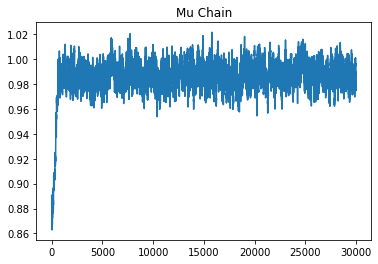

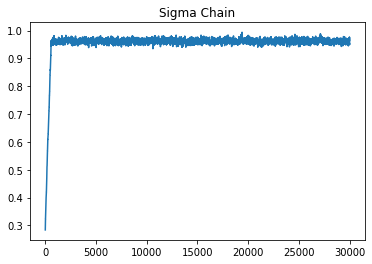

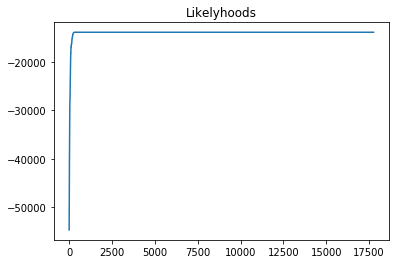

Histograms:


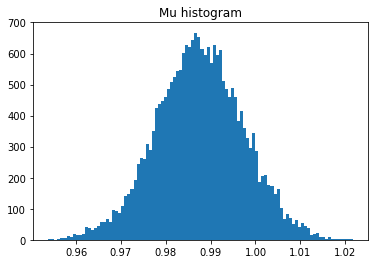

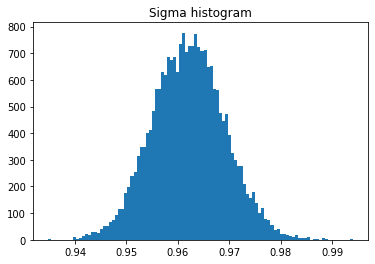

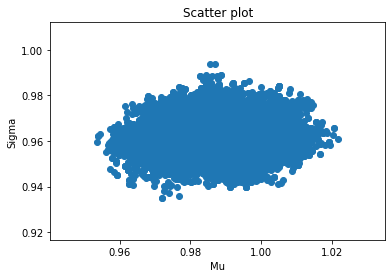

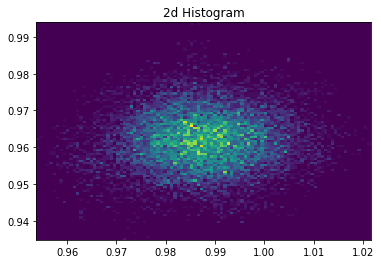

In [122]:
muSigmaChains(chain,stepSigma=.003,N=30000)

MCMC assignment 3